In [171]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [172]:
import time

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [190]:
from xgboost.sklearn import XGBRegressor # Extreme Gradient Boosting
import xgboost as xgb

In [176]:
# load dataset
data = pd.read_pickle('mail_out_cleaned_no_pca.pkl')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=2)

In [177]:
X

,ANZ_HAUSHALTE_AKTIV,ANZ_PERSONEN,ALTERSKATEGORIE_GROB_2,ALTERSKATEGORIE_GROB_3,ALTERSKATEGORIE_GROB_4,ALTERSKATEGORIE_GROB_9,ANREDE_KZ_2,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,...,SEMIO_MAT,SEMIO_PFLICHT,SEMIO_RAT,SEMIO_REL,SEMIO_SOZ,SEMIO_TRADV,SEMIO_VERT,WOHNDAUER_2008,WOHNLAGE,W_KEIT_KIND_HH
0,0.032037,0.000000,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.000000,0.333333,0.166667,0.000000,0.666667,0.000000,0.333333,1.000,0.375,1.0
1,0.000000,0.043478,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.666667,0.666667,0.500000,0.333333,0.000000,0.333333,0.500000,1.000,0.875,0.6
2,0.002288,0.043478,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.833333,0.000000,0.000000,0.666667,0.333333,0.000000,1.000000,1.000,0.250,1.0
3,0.006865,0.043478,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.000000,0.500000,0.166667,0.166667,0.666667,0.333333,0.166667,1.000,0.125,1.0
4,0.118993,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.833333,0.500000,0.666667,0.500000,0.833333,0.166667,1.000000,1.000,0.375,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42957,0.000000,0.043478,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.500000,0.500000,0.333333,0.166667,0.833333,0.500000,1.000000,0.875,0.875,0.6
42958,0.000000,0.043478,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.500000,0.000000,0.166667,0.500000,0.333333,0.500000,0.666667,1.000,0.875,0.8
42959,0.002288,0.086957,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.500000,0.000000,0.333333,0.333333,0.500000,1.000000,1.000,0.875,0.2
42960,0.004577,0.086957,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.333333,0.166667,0.333333,0.000000,0.500000,0.000000,0.666667,1.000,0.250,0.2


# Logistic regression

In [178]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [179]:
# predict probabilities
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=52)

model = LogisticRegression(max_iter=100000, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=100000)

In [180]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, model.predict(X_train))

In [181]:
def model_score(model):
    print('ROC_AUC_TRAIN: {:0.2f}'.format(roc_auc_score(y_train, model.predict(X_train))))
    print('ROC_AUC_TEST set: {:0.2f}'.format(roc_auc_score(y_test, model.predict(X_test))))
    return None

In [182]:
model_score(model)

ROC_AUC_TRAIN: 0.70
ROC_AUC_TEST set: 0.50


In [183]:
## Very low score when using logistic regression, try models with more complex decision boundaries

# Support vector machine

In [184]:
from sklearn import svm

In [185]:
clf_1 = svm.SVC(class_weight={1: 10})
clf_1.fit(X_train, y_train)
model_score(clf_1)

ROC_AUC_TRAIN: 0.91
ROC_AUC_TEST set: 0.50


In [186]:
clf = svm.SVC(class_weight='balanced', C= 10)
clf.fit(X_train, y_train)
model_score(clf)

ROC_AUC_TRAIN: 0.95
ROC_AUC_TEST set: 0.49


In [158]:
# include cross validation
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc', n_jobs = -1)

In [187]:
scores.mean()

0.512504843430476

In [170]:
# Only slightly improve when including cross validation in the model

#  Test : 

In [201]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [202]:
y_train.sum()

422

In [205]:
np.unique(xg_reg.predict(X_test))

array([0.19099], dtype=float32)

## test a couple of models

In [32]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 0.8, 5), scoring='roc_auc'):
    """
    Generate 1 plot: the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes.set_title(title)

    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                                                            train_sizes=train_sizes,
                                                            return_times=False,
                                                            scoring='roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1,
                      color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")
    axes.legend(loc="best")

    return plt

In [33]:
models = {'RandomForestClassifier': RandomForestClassifier(random_state=42), 
          'AdaBoostClassifier': AdaBoostClassifier(random_state=42), 
          'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42)
         }

In [34]:
for i, model in enumerate(models.items()): 
    print(model[1])

RandomForestClassifier(random_state=42)
AdaBoostClassifier(random_state=42)
GradientBoostingClassifier(random_state=42)


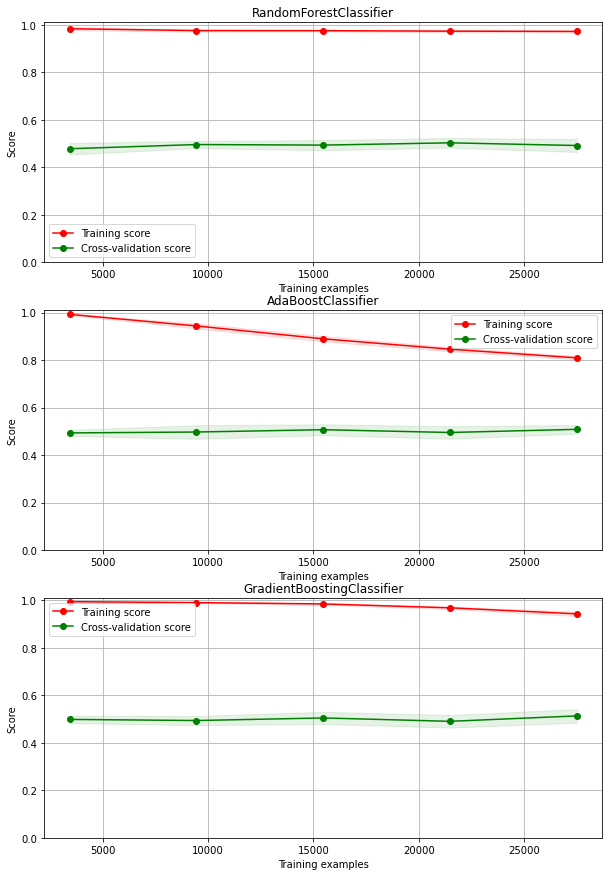

In [36]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for idx, model in enumerate(models.items()): 
    title = model[0]
    
    # Cross validation with 100 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits= 10, test_size=0.2, random_state=0)
    estimator = model[1] #LogisticRegression(max_iter=1000)
    plot_learning_curve(estimator, title, X, y, axes=axes[idx], ylim=(0.0, 1.01),
                        cv=cv, n_jobs= 4)
    

# Gradient Boost - Grid search

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter

In [36]:
counter = Counter(y)
weight = counter[0] / counter[1]

# define model
model = GradientBoostingClassifier()

# define cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('Mean AUROC: %.3f' % np.mean(scores))

Mean AUROC: 0.520


In [38]:
clf = GradientBoostingClassifier()
clf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [42]:
from sklearn.model_selection import GridSearchCV

In [207]:
from sklearn.ensemble import AdaBoostRegressor # Adaptive Boosting
from sklearn.ensemble import GradientBoostingRegressor # Gradient Tree Boosting
from xgboost.sklearn import XGBRegressor # Extreme Gradient Boosting
import xgboost as xgb

In [209]:
alg_abr = AdaBoostRegressor(random_state=42)
alg_gbr = GradientBoostingRegressor(random_state=42)
alg_xgb = XGBRegressor(random_state=42)


for clf in [alg_abr, alg_gbr, alg_xgb]:
    
    clf.fit(X_train, y_train)
    model_score(clf)
    

ROC_AUC_TRAIN: 0.56
ROC_AUC_TEST set: 0.51
ROC_AUC_TRAIN: 0.87
ROC_AUC_TEST set: 0.50
ROC_AUC_TRAIN: 0.96
ROC_AUC_TEST set: 0.48


In [212]:
clf_final = xgb.XGBRegressor(
    objective = 'binary:logistic',
    max_depth = 5,
    min_child_weight = 2,
    learning_rate = 0.01,    
    reg_alpha = 0.05,
    subsample = 0.6,
    colsample_bytree = 0.7,
    gamma = 0.2,    
    scale_pos_weight = 1,
    random_state = 42,
    n_estimators = 500,
    scoring = 'roc_auc')



[23:39:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { scoring } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.5295467941230054
